In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)
X_train,X_test,y_train,y_test

(      age     bmi  children  sex_male  smoker_yes
 1163   18  28.215         0         0           0
 196    39  32.800         0         0           0
 438    52  46.750         5         0           0
 183    44  26.410         0         0           0
 1298   33  27.455         2         1           0
 ...   ...     ...       ...       ...         ...
 763    27  26.030         0         1           0
 835    42  35.970         2         1           0
 1216   40  25.080         0         1           0
 559    19  35.530         0         1           0
 684    33  18.500         1         0           0
 
 [936 rows x 5 columns],
       age     bmi  children  sex_male  smoker_yes
 578    52  30.200         1         1           0
 610    47  29.370         1         0           0
 569    48  40.565         2         1           1
 1034   61  38.380         0         1           0
 198    51  18.050         0         0           0
 ...   ...     ...       ...       ...         ...
 126

In [12]:
###Support Vector Regression

In [13]:
from sklearn.svm import SVR
regressor=SVR(kernel="sigmoid",C=10,)
regressor.fit(X_train,y_train)

C:\Anaconda 3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='sigmoid')

In [14]:
y_pred=regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)

In [16]:
r_score

-0.09078319814614

In [17]:
###Multi Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred=regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)

In [21]:
r_score

0.7894790349867009

In [22]:
###Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error',splitter='random',max_features='sqrt')
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_features='sqrt', splitter='random')

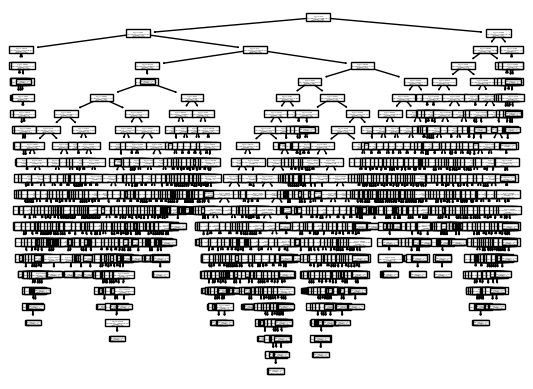

In [24]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)

In [27]:
r_score

0.6390586996134497

In [28]:
###Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(criterion='friedman_mse',max_features='log2',n_estimators=100)
regressor.fit(X_train, y_train)

C:\Anaconda 3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='friedman_mse', max_features='log2')

In [30]:
y_pred=regressor.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [32]:
r_score

0.8707231300962814